# 远程监督去噪开放域问答

林彦凯，季浩哲，刘志远,孙茂松

国家智能技术与系统重点实验室，

计算机科学与技术系，

北京国家信息科学技术研究中心，

清华大学，北京，中国

{linyk14, jhz16} @mails.tsinghua.edu.cn, {liuzy,sms}@tsinghua.edu.cn

# 摘要
远程监督开放域问题回答(DS-QA)旨在从未标记的文本集合中寻找答案。现有的DS-QA模型通常从大型语料库中检索相关段落，并应用阅读理解技术从最相关的段落中提取答案。他们忽略了其他段落中所包含的丰富信息。此外，远程监控数据不可避免地会伴随着错误的标注问题，这些噪声数据会大大降低DS-QA的性能。为了解决这些问题，我们提出了一种新颖的DS-QA模型，该模型使用段落选择器过滤掉那些有噪声的段落，并使用段落阅读器从去噪的段落中提取正确的答案。在实际数据集上的实验结果表明，与所有基线相比，我们的模型能够从噪声数据中获取有用的信息，并在DS-QA上取得显著的改进。本文的源代码和数据可以从https://github.com/thunlp/OpenQA获得

# 1介绍
摘要阅读理解是近年来自然语言处理(NLP)研究的一个热点问题，它的目的是回答有关文档的问题。许多阅读理解系统已经被提出以来,并取得了可喜的成果，自从多层架构和注意力机制允许他们推动问题，在某种程度上阅读理解已经显示出最近的神经模型在阅读、处理和理解自然语言文本方面的能力。

尽管取得了成功，但现有的阅读理解系统依赖于预先确定的相关文本，而这些文本并不总是存在于真实的问答场景中。因此，阅读理解技术不能直接应用于开放领域的QA任务。近年来，研究人员试图用一个大规模的未标记语料库来回答开放领域的问题。Chen等(2017)提出了一种远程监督开放域问答(DS-QA)系统，该系统利用信息检索技术从维基百科中获取相关文本，然后应用阅读理解技术提取答案。

尽管DS-QA提出了一种有效的自动采集相关文本的策略，但它始终存在噪声问题。例如，对于“哪个国家的首都是都柏林?”(1)检索到的段落“都柏林是爱尔兰最大的城市……”实际上并没有回答这个问题;(2)检索到的段落“都柏林”是爱尔兰的首都。此外，都柏林是爱尔兰著名的旅游城市之一，而且……并不是正确答案的标记。这些嘈杂段落和词被DS-QA视为有效的实例为了解决这个问题，Choi等人(2017)将DS-QA中的答案生成分为两个模块，包括在文档中选择一个目标段落，通过阅读理解从目标段落中提取正确答案。进一步,Wang等人(2018a) 利用强化学习训练目标段落选择和答案无缝提取。

这些方法只提取跟答案最相关的段落, 将失去大量丰富的信息包含在 Figure 1: 我们模型的 概述对于“都柏林的首都是什么?”,段落选择器选择两款p1和p3实际上对应于段落.检索的所有的问题然后我们的段落阅读器从所有选定的段落中提取正确的答案“都柏林”(红色)。最后，系统对提取的结果进行汇总，得到最终的结果。

那些被忽视的段落。事实上,正确答案往往是多个段落和在几个段落中提到的不同方面的问题. 因此,Wang等人(2018b)提出进一步明确明确收集不同段落的证据，重新排序提取的答案。方法仍然依赖于现有的答案获得DS-QA系统,和实质上未能大幅解决DS-QA噪音问题.

为了解决这些问题，我们提出了一种粗到精的DS-QA去噪模型。从图1中所示,我们的系统首先从大规模语料库根据问题检索问题的段落。然后为了利用所有的信息段落，我们采用一个快速的段落选择器来浏览所有检索到的段落并过滤掉那些嘈杂的段落。然后我们应用一个精确的段落阅读器进行仔细阅读提取答案, 每个选定的段落最后，我们将所有选定段落的导出结果聚合起来，以获得最终的答案。快速略读的段落选择器和精读阅读器在我们方法能够使DS-QA降噪、段落 , 以及维护效率。

在Quasar-T、SearchQA和TriviaQA等真实数据集上的实验结果表明，与所有基线方法相比，我们的系统通过聚合所有信息段落的提取答案，实现了显著的、一致的改进。特别地，我们证明了我们的模型可以通过选择几个信息段落来达到类似的性能，这大大加快了整个DS-QA系统的速度。我们将在Github上发布这项工作的所有源代码和数据集，以进行进一步的研究探索。

# 2 相关工作
问答是自然语言处理中最重要的任务之一。在QA方面已经投入了很多努力，尤其是在开放领域的QA方面。开放域QA最早是由(Green Jr . et al.， 1961)提出的。该任务旨在使用外部资源回答开放领域的问题，如文档集合(Voorhees et al.， 1999)、网页(Kwok et al.2001;Chen and Van Durme, 2017)，结构化知识图(Berant et al.， 2013a;或者自动提取关系三元(Fader et al.， 2014)。

近年来，随着机器阅读理解技术的发展(Chen et al.， 2016;Dhingra等，2017a;崔等，2017;沈等，2017;)研究人员试图通过对普通文本进行阅读理解来回答开放领域的问题。Chen等(2017)提出了一种DS-QA系统，该系统从大规模语料库中检索问题的相关文本，然后使用阅读理解模型从这些文本中提取答案。然而，在DS-QA中检索到的文本往往存在噪声，影响了DS-QA的性能。因此，Choi et al.(2017)和Wang et al. (2018a)试图通过将问答问题分解为段落选择和答案提取来解决DS-QA中的噪声问题，他们都只是在所有检索到的段落中选择最相关的段落来提取答案。它们丢失了那些被忽视的段落中所包含的大量丰富信息。因此，Wang等(2018b)提出了基于强度基础和覆盖率的重新排序方法，该方法可以将现有DS-QA系统从每个段落中提取的结果进行汇总，从而更好地确定答案。然而，该方法依赖于现有DS-QA模型的预提取结果，由于对所有检索到的段落都进行了不加区分的考虑，因此在远程监控数据中仍然存在噪声问题。与这些方法不同的是，我们的模型使用了一个段落选择器来过滤掉那些有噪声的段落，并保留那些有信息的段落，从而可以充分利用有噪声的DS-QA数据。

我们的工作也受到了NLP中粗到细模型的启发。Cheng和Lapata(2016)和Choi等人(2017)提出了一个由粗到精的模型，首先选择基本的句子，然后分别对选择的句子进行文本摘要或阅读理解。Lin等(2016)利用选择性注意力机制对所有句子的信息进行聚合，提取关系事实。Yang et al.(2016)提出了一种分层注意力机制网络，该网络在文档分类中应用了单词和句子两个层次的注意。我们的模型也采用由粗到精的模型来处理DS-QA中的噪声问题，DS-QA首先选择检索到的信息段落，然后从这些选择的段落中提取答案。

# 3方法
在本节中，我们将详细介绍我们的模型。我们的模型旨在从大规模的无标记语料库中提取给定问题的答案。首先利用信息检索技术从开放域语料库中检索与问题对应的段落，然后从这些段落中提取答案。

正式,因为一个问题 q = (q1、q2,···qq),我们m段落检索被定义为P ={p1,p2,...,pm},pi = (p1i p2i,···, ppi)是第i个段落检索。我们的模型度量给定问题q和对应段落集合p抽取答案的概率。如图1所示，我们的模型包含两部分:
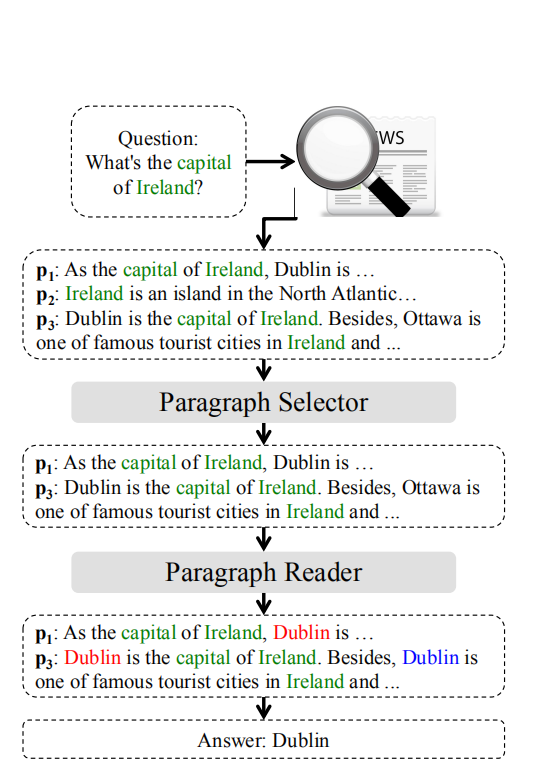

* 1. 段选择器。
给定问题q和检索到的段落P，段落选择器度量检索到的所有段落的概率分布Pr(pi|q, P)，该概率分布Pr用于选择真正包含问题q答案的段落。
* 2. 段落阅读器。
给定问题q和段落pi，段落阅读器计算通过多层长短时记忆网络提取答案a的概率Pr(a|q, pi)。
总的来说，提取给定问题q的答案的概率Pr(a|q, P)可以计算为:

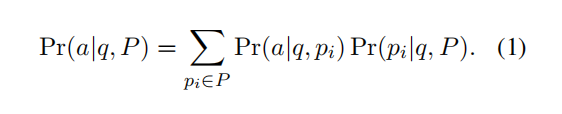

## 3.1段选择器
由于DS-QA数据中不可避免地会出现错误的标注问题，因此在对所有检索到的段落信息进行挖掘时，需要过滤掉这些有噪声的段落。很明显，我们需要估计每一段的置信度。因此，我们使用段落选择器来度量包含所有段落中答案的每个段落的概率。

段编码。我们第一次代表每个单词pji pji段π的词向量,然后给每个词向量到p神经网络获取隐藏表示ˆ霁。这里，我们采用了两种类型的神经网络:
1.多层感知器(MLP)
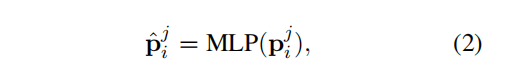
2.递归神经网络(RNN)
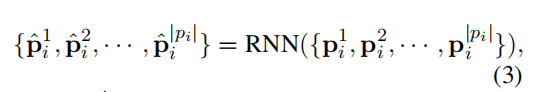

pˆji预计将编码语义信息的词pji及其周边的话。RNN,我们选择一个单层双向长期短期记(LSTM)作为我们的RNN网络单元,和连接所有层的隐状态获得pˆji。

编码问题。与段落编码类似，我们也将问题中的每个单词qi表示为其单词向量 qi，然后将它们输入MLP:
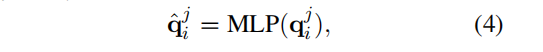
或者一个 RNN:
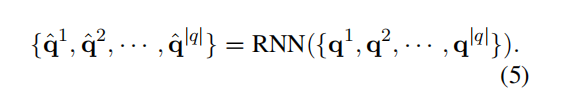

在问ˆj qj这个词的隐藏表示,预计编码它的上下文信息。然后，我们对隐藏的表征进行自我注意运算，得到问题q的最终表征q:
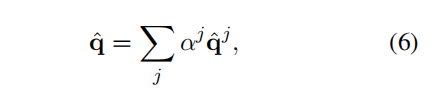
αj编码每个问题的重要性词和计算:
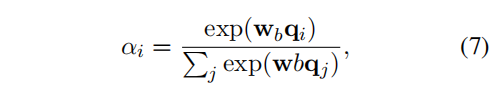

其中w是一个习得的权向量。

接下来，我们通过max-pooling层和softmax层计算每个段落的概率:
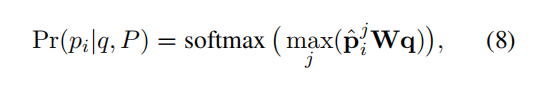
其中W是要学习的权值矩阵。
## 3.2段落阅读器
段落读者的目的是从段落pi中提取答案。与段落阅读器类似，我们首先通过多层双向LSTM将每个段落pi编码为{p¯1i, p¯2i，···，p¯|pi| i}。我们还通过一个自我关注的多层双向LSTM得到了嵌入q¯的问题。

段落阅读器的目标是提取最可能是正确答案的标记的范围。我们把它分成预测答案张成的空间的开始和结束位置。因此，从给定段落pi中提取问题q的答案a的概率可以计算为:
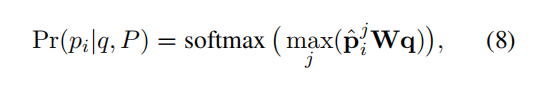
其中as和ae分别表示段落中答案a的起始位置和结束位置，Ps(as)和Pe(ae)分别为as和ae分别为起始词和结束词的概率，计算公式为:
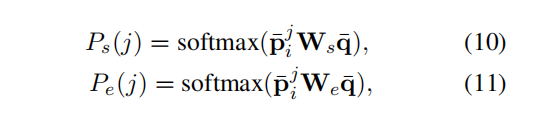
其中Ws和We是两个需要学习的权重矩阵。在DS-QA中，由于我们没有手动标记答案的位置，所以我们可能在一个段落中有多个与正确答案匹配的标记。设{(a1s, a1e)，(a2s, a2e)，···，(a|a| s, a|a| e)}为pi段中与答案a匹配的令牌的开始和结束位置集合。式(9)用两种方法进一步定义:

(1)Max。也就是说，我们假设段落中只有一个标记表示正确的答案。这样，通过最大化所有候选令牌的概率来定义提取答案a的概率:
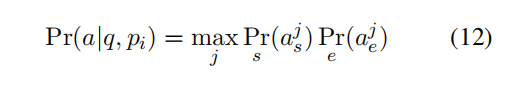
(2)Sum。这样，我们对所有与正确答案匹配的标记都一视同仁。我们将答案抽取概率定义为:
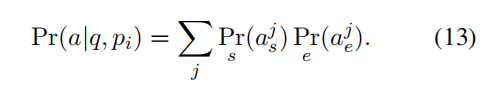

我们的段落阅读模型是受到之前机器阅读理解模型的启发，即(Chen et al.， 2016)中描述的细心的读者。事实上，其他的阅读理解模式也可以很容易地作为我们的段落读者。由于篇幅的限制，本文仅探讨了专心阅读的有效性。
## 3.3学习与预测
对于学习目标，我们使用极大似然估计定义损失函数L:
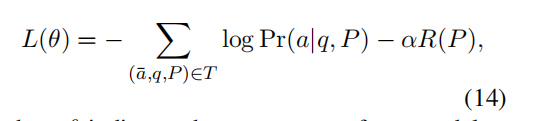
θ表示我们的模型的参数,显示正确答案,T是整个训练集和R (P)是一个正规化术语/段落选择器,以避免过度拟合。这里，R(P)定义为Pr(pi|q, P)与概率分布X之间的KL散度，其中Xi = 1cP (cP是P中包含正确答案的段落数)，如果该段落包含正确答案，则为0。其中R(P)定义为:
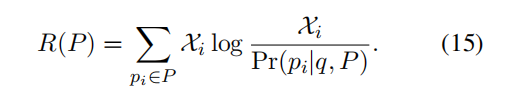

为了解决优化问题，我们采用Adamax将目标函数最小化，如(Kingma and Ba, 2015)所述。
在测试过程中,我们提取答案ˆ最高的概率如下:
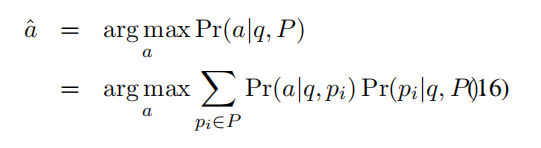

在这里，段落选择器可以看作是快速浏览所有段落，这决定了包含每个段落答案的概率分布。因此，我们可以简单地将这些具有较高加速概率的段落的预测结果聚合起来。